## 前面这个方法没有直接用geopandas靠谱，当踩雷了

## 数据是都没问题的

In [1]:
from osgeo import ogr, osr
import requests
import json
import matplotlib.pyplot as plt

In [45]:
def plot_shp(shp_path):
    data_source = ogr.Open(shp_path)
    layer = data_source.GetLayer(0)
    
    for feature in layer:
        geom = feature.GetGeometryRef()
        if geom.GetGeometryName() in ['POLYGON','MULTIPOLYGON']:
            for i in range(geom.GetGeometryCount()):
                    # 对于多边形和多多边形，遍历所有外部环和内部环（如果有的话）
                    ring = geom.GetGeometryRef(i)
                    if ring:
                        points = ring.GetPoints()  # 获取环的点
                        if points:
                            x, y = zip(*points)  # 解压缩点到x和y坐标列表
                            plt.plot(x,y,'k')
        elif geom.GetGeometryName() in ['LINESTRING','MULTILINESTRING']:
            for i in range(geom.GetGeometryCount()):
                line = geom.GetGeometryRef(i)
                if line:
                    points = line.GetPoints()
                    if points:
                        x, y = zip(*points)
                        plt.plot(x,y,'k')
        elif geom.GetGeometryName() in ['POINT','MULTIPOINT']:
            for i in range(geom.GetGeometryCount()):
                pt = geom.GetGeometryRef(i)
                if pt:
                    x, y = pt.GetX(), pt.GetY()
                    plt.plot(x, y, 'ko')  # 'ko' 表示黑色的圆点
    
    # 显示图形
    plt.show()

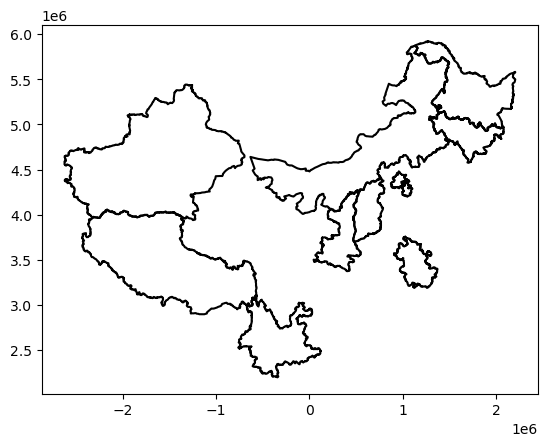

In [47]:
plot_shp(r'C:\GIS union python\data\2022年省界\sheng2022.shp')

## 直接用geopandas和matplotlib实现

In [41]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

<Figure size 1000x1000 with 0 Axes>

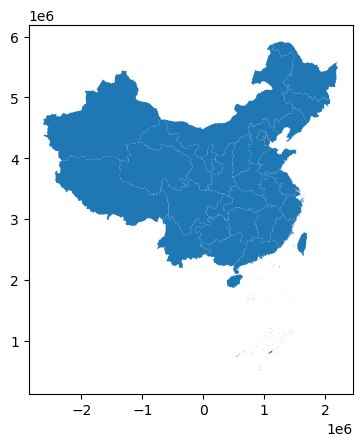

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file(r'C:\GIS union python\data\2022年省界\sheng2022.shp')
plt.figure(figsize=(10,10))
gdf.plot()


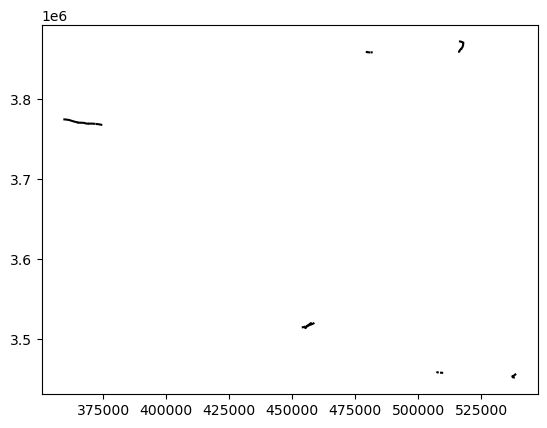

In [51]:
plot_shp(r'C:\GIS union python\data\江苏国道\JsGd.shp')

<Axes: >

<Figure size 1000x1000 with 0 Axes>

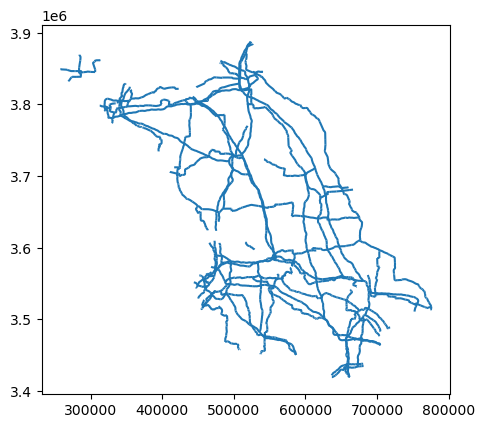

In [53]:
gdf = gpd.read_file(r'C:\GIS union python\data\江苏国道\JsGd.shp')
plt.figure(figsize=(10,10))
gdf.plot()